<a href="https://colab.research.google.com/github/SarinaMashreghi/ML-notebooks/blob/main/tensorflow_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# tf.__version__

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

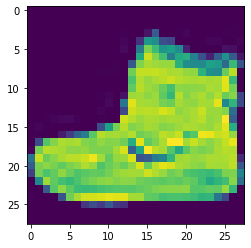

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']


Text(0.5, 1.0, 'Bag')

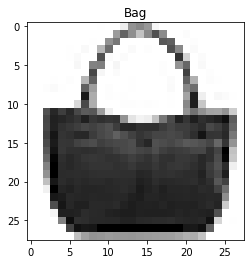

In [ ]:
index = 100
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

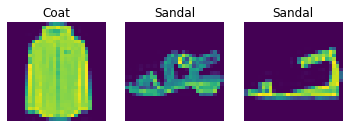

In [ ]:
from os import name
import random
plt.figure()
for i in range(3):
  ax=plt.subplot(1,3,i+1)
  rand=random.randrange(len(train_data))
  plt.imshow(train_data[rand])
  plt.title(class_names[train_labels[rand]])
  plt.axis(False)


In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)  
])

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data, 
                    train_labels, 
                    epochs=100,
                    validation_data=(test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 12s 4ms/step - loss: 2.3702 - accuracy: 0.1077 - val_loss: 2.2691 - val_accuracy: 0.1176
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2230 - accuracy: 0.1373 - val_loss: 2.0464 - val_accuracy: 0.1658
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7988 - accuracy: 0.2497 - val_loss: 1.6995 - val_accuracy: 0.2852
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6419 - accuracy: 0.2944 - val_loss: 1.6092 - val_accuracy: 0.3127
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6055 - accuracy: 0.3090 - val_loss: 1.6693 - val_accuracy: 0.2704
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5561 - accuracy: 0.3413 - val_loss: 1.5664 - val_accuracy: 0.3414
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4327 - accuracy: 0.4004 - val_loss: 1.3903 - val_a

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data_scaled = train_data/255.0
test_data_scaled = test_data/255.0

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer="adam",
               metrics=["accuracy"])

history_normalized=model2.fit(train_data_scaled,
          train_labels,
          epochs=10,
          validation_data=(test_data_scaled, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6973 - accuracy: 0.7524 - val_loss: 0.5060 - val_accuracy: 0.8190
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4645 - accuracy: 0.8332 - val_loss: 0.5339 - val_accuracy: 0.8150
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4375 - accuracy: 0.8432 - val_loss: 0.4746 - val_accuracy: 0.8234
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4200 - accuracy: 0.8509 - val_loss: 0.4649 - val_accuracy: 0.8348
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4118 - accuracy: 0.8514 - val_loss: 0.4676 - val_accuracy: 0.8340
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4026 - accuracy: 0.8556 - val_loss: 0.4544 - val_accuracy: 0.8380
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3963 - accuracy: 0.8590 - val_loss: 0.4549 - val_accuracy:

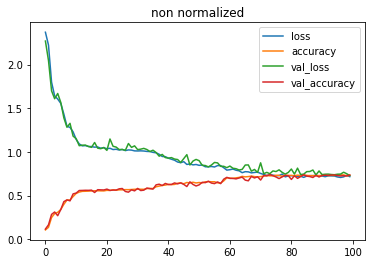

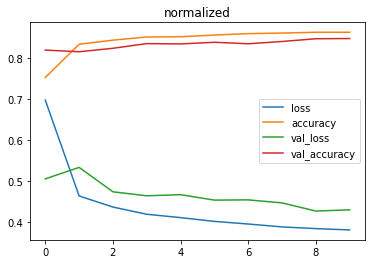

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(title="non normalized")
pd.DataFrame(history_normalized.history).plot(title="normalized")